## Lab 2. Bond-breaking in $H_2$

In this lab, you will:
* Investigate the bond-breaking reaction in $H_2$ molecule.
* Compare the performance of restricted and unrestricted Hartree-Fock, and Density Functional Theory for bond breaking.
* Benchmark these results with respect to the Full Configuration Interaction (FCI) values obtained using the coupled cluster with single and double excitations (CCSD) calculations, which give the exact answer for the two-electron system. 
* Calculate the correlation energy.
* Distinguish from dynamic and static correlation

Authors: Lyudmila Slipchenko (lslipchenko@purdue.edu; ORCID: 0000-0002-0445-2990) and Victor H. Chavez (gonza445@purdue.edu; ORCID: 0000-0003-3765-2961), 


***

In [1]:
#Import modules

import psi4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


***

## Procedure

Use *6-31G*** basis for all the calculations in this lab.

We want to construct the $H_2$ potential energy surface. (For a molecule with one degree of freedom this is just a curve).
You need to run a series of calculations ad different H-H separations (in Angstroms) e.g:

0.3, 0.4, 0.5, ... ,4.9, 5.0

#### 1. Calculate the potential energy sufrace at the *RHF* level (This is the default calculation in Psi4). Store the electronic energies at all calculated points. 

**Hint** : We can take advantage of the fact that the psi4.geometry takes a string. And in python, we are able to easily replace a segment of a string. Look at the following example:


In [10]:
#Remember that you can store your results in a list or dictionary

#Define string with psi4.geometry syntax. 
#Identify what you want to change and use a particular label that you know that won't get repeated. 
molecule = """
**atom1** 0.0 0.0 0.0
H 0.0 0.0 0.0 

units angstrom
"""

#Create a list with the things that you want to go through. 
atoms = [ "H", "He", "Li" ]

#Cycle through them. 
for atom in atoms:
    print(molecule.replace("**atom1**", atom))
    
    
#Define all of the distances:
distances = np.linspace(0.3, 5.0, 30)


H 0.0 0.0 0.0
H 0.0 0.0 0.0 

units angstrom


He 0.0 0.0 0.0
H 0.0 0.0 0.0 

units angstrom


Li 0.0 0.0 0.0
H 0.0 0.0 0.0 

units angstrom



In [11]:
#RESPONSE:

binding = """
H 0.0 0.0 0.0 
H 0.0 0.0 **R**

units angstrom
symmetry c1
"""

RHF = []

psi4.core.clean()
psi4.set_options({'reference' : 'rhf'})

for r in distances:
    mol = psi4.geometry(binding.replace("**R**", str(r)))
    energy = psi4.energy("SCF/6-31G**", molecule=mol)
    RHF.append(energy)

#### 2. Calculate the same potential energy surface at the UHF level. 

You can recycle the previous code that you just wrote. Just remember to change the name of your variables. 

We need to tell Psi4 that we want an UHF calculation. This is done by setting the global option "reference" as "UHF" as in the next cell. The argument of the function is a dictionary. Mind the notation.




In [12]:
psi4.core.clean()
psi4.set_options({'reference' : 'uhf', 
                  'guess_mix' : True, 
                  'guess' : "sad"})

In [13]:
#RESPONSE

UHF = []

for r in distances:
    mol = psi4.geometry(binding.replace("**R**", str(r)))
    energy = psi4.energy("SCF/6-31G**", molecule=mol)
    UHF.append(energy)

#### 3. Calculate the same potential energy surface at the DFT level. Use the PBE functional and a restricted wavefunction.  

In [14]:
#RESPONSE

psi4.core.clean()
psi4.set_options({'reference' : 'RKS'})

DFT = []

for r in distances:
    mol = psi4.geometry(binding.replace("**R**", str(r)))
    energy = psi4.energy("PBE/6-31G**", molecule=mol)
    DFT.append(energy)

#### 4. Calculate the same potential energy surface at the FCI level. For a two-electron system, the FCI results may be obtained by using the CCSD method (details on this technique will com in due at a time)

FT level. Use the PBE functional and a restricted wavefunction.  

In [15]:
#RESPONSE

psi4.core.clean()
psi4.set_options({"reference":"UHF"})

CCSD = []

for r in distances:
    mol = psi4.geometry(binding.replace("**R**", str(r)))
    energy = psi4.energy("CCSD/6-31G**", molecule=mol)
    CCSD.append(energy)

Also, record total CCSD ampltitudes: CCSD $T_1^2$ and $T_2^2$, and the value of the largest $T_2$ amplitude. 

The values of amplitudes show a relative weight of singly and doubly excited determinants in the wavefunction. If $T_1$ and/or $T_2$ are large(generally speaking, if $T_2>0.1$), the wavefunction is considered to be multi-configurational (i.e., containing several important Slater determinants). In other words, this is a region where non-dynamic (static) correlation is significant. Several small $T_1$ and $T_2$ amplitudes tell about (almost always present) dynamic correlation.

#Response

**For ground state geometry:**
    
Largest TIA Amplitudes:
          0   0         0.0092943745 
          0   1         0.0039157527 

Largest Tia Amplitudes:
          0   0         0.0092943745 
          0   1         0.0039157527 
          
**For separated atoms:**

Largest TIA Amplitudes:
          0   0         0.0840520015 
          0   1        -0.0012362405 

Largest Tia Amplitudes:
          0   0         0.0840520015 
          0   1        -0.0012362405
 



    

#### 5. Calculate the energy of a single H atom (change the multiplicity value correspondingly) with HF and DFT methods in the same basis set. Explain what will be the energy in HF and FCi methods. Proceed to use the energy to calculate the binding energy in $H_2$:

$$ E_{bind} = E(H_2) - 2E(H)  $$

In [16]:
# RESPONSE

psi4.set_options({"reference":"uhf"})

h = psi4.geometry("""
0 2
H
symmetry c1
""")

hf_energy = psi4.energy("SCF/6-31G**", molecule=h)
dft_energy = psi4.energy("PBE/6-31G**", molecule=h)
ccsd_energy = psi4.energy("CCSD/6-31G**", molecule=h)

print(F"HF Energy:   {hf_energy}")
print(F"DFT Energy:  {dft_energy}")
print(F"CCSD Energy: {ccsd_energy}")

HF Energy:   -0.49823291072907006
DFT Energy:  -0.49743231367499213
CCSD Energy: -0.4982329107290702


Since we only have one electron. We can exactly express the energy of a hydrogen atom with a single slater determinant. THus, HF and CCSD produce the same energy. 

#### 6. Plot on the same graph the RHF, DFT and FCI binding energies in $H_2$ versus the separation distance. Use kcal/mol energy units (1 Hartree = 627.5 kcal/mol)

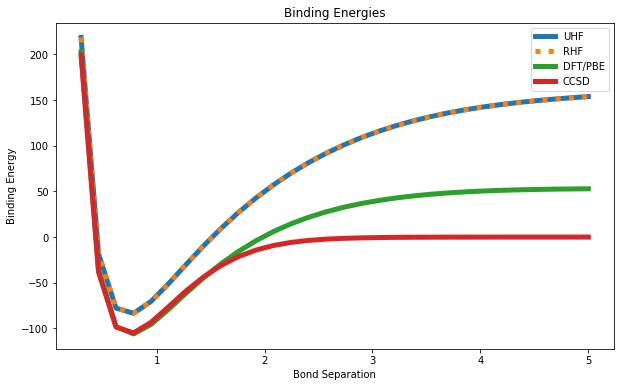

In [17]:
#RESPONSE

be_rhf   = (np.array(RHF)  - 2*(-0.49823291072907))* 627.51
be_uhf   = (np.array(UHF) -  2*(-0.49823291072907))* 627.51
be_dft  = (np.array(DFT)  - 2*(-0.49743231367957))* 627.51
be_ccsd = (np.array(CCSD) - 2*(-0.49823291072907))* 627.51

fig = plt.figure(figsize=(10,6))

plt.title("Binding Energies")
plt.xlabel("Bond Separation")
plt.ylabel("Binding Energy")


plt.plot(distances, be_uhf,   label="UHF",     lw=5)
plt.plot(distances, be_rhf,   label="RHF",     lw=5, ls=":")
plt.plot(distances, be_dft,  label="DFT/PBE", lw=5)
plt.plot(distances, be_ccsd, label="CCSD",    lw=5)


plt.legend()

#### 7. Comment on the behaviour of RHF with respect to FCI at short (around 0.7 Angstroms) and long distances. If you want more information, you can read paragraph 3.8.7 from Szabo and Ostlund book for a discussion of RHF and UHF solutions. 

In [18]:
#RESPONSE

#### 8. Plot the first two $H_2$ moleccular orbitals from your HF and FCI calculations at equillibrium , 1.3 and 5.0 Angstroms. Comment on qualitative changes in the shape of the orbitals.

In [19]:
#RESPONSE

#### 9. Difference between FCI and HF energies is the correlation energy. What is the nature of the correlation energy (dynamic vs non-dynamic) in $H_2$ at equillibrium and long distances? at what distance the non-dynamic correlation become imoprtant?

In [20]:
#RESPONSE

#### 10. Comment on the behaviour of DFT at equilibrium and long distances. What is the reason of DFT failure for bond-breaking. 

In [21]:
#RESPONSE

#### Bonus question. Try computing the energy of a Hydrogen atom with the hybrid B3LYP functional. Compare the energy of the atom computed with HF, B3LYP and the exact energy. Do you see any discrepancy with B3LYP? If so, what is/are the reasons for such discrepancies?

In [22]:
#RESPONSE

***

## Part B

Your friend, who is an experimental chemist, seeks your help knowing that you have expertise in running quantum chemistry simulations. Their research group has measurd the singlet-triplet gap of ozone recently. They want to see if computational simulations can support their measurement. How will you measure the singlet-triplet gap in ozone?

Use the ideas from the previous part of this lab and the follwoing hints:
    

   1. Assume that the singlet and triplet ozone molecules have the same geometry. 
   2. You will have to optimize the geometry of ozone to start with. Alternately, you can grab the optimized geometry of $O_3$ from CCCBDB. 
   3. Use RHF/6-31G* for simulating the singlet ozone molecule. Use UHF/6-31G* for simulating the triplet ozone molecule. Use the energy difference to compute the gap. 
   4. Write the electronic energies corresponding to singlet and triplet ozone molecules. the singlet-triplet gap in eV, and the $<S^2>$ value for triplet ozone.
    
   
    

In [23]:
#Response

Now, compute the singlet-triplet gap (between the $^1\Delta_g$ and $^3\Sigma_g ^-$ states) of oxygen molecule and report it in eV. Compare the singlet-triplet gap you computed in this lab with the ones availiable in CCBDB. Is it an exact match (http://cccbdb.nist.gov/stgap1.asp)?


<img src="./ozone.png">

Of all the four cases you have computed so far, which one suffers the most spin contamination?

In [ ]:
#Response

Bonus. Compute the singlet-triplet gap between $^1\Sigma_g ^+$ and $^3\Sigma_g ^-$ states of oxygen atom.  

**Hint**: Start with $^1 \Delta_g$ geometry. Use the maximum overlap method (MOM) to force the highest beta electron to occupy the second $\pi^*$ ortibal.  

For example: http://www.q-chem.com/qchem-website/manual/qchem50_manual/sect-mom.html)

In [ ]:
#Response